In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('places.csv')
df.head()

,Unnamed: 0,longitude,latitude
0,0,-112.070792,33.451625
1,1,-112.065542,33.449298
2,2,-112.073931,33.456491
3,3,-112.074866,33.470115
4,4,-80.525690,43.477099


In [3]:
#ms_df = df[['longitude','latitude']]
#ms_df
new_df = df[['longitude','latitude']]
new_df.head()

,longitude,latitude
0,-112.070792,33.451625
1,-112.065542,33.449298
2,-112.073931,33.456491
3,-112.074866,33.470115
4,-80.525690,43.477099


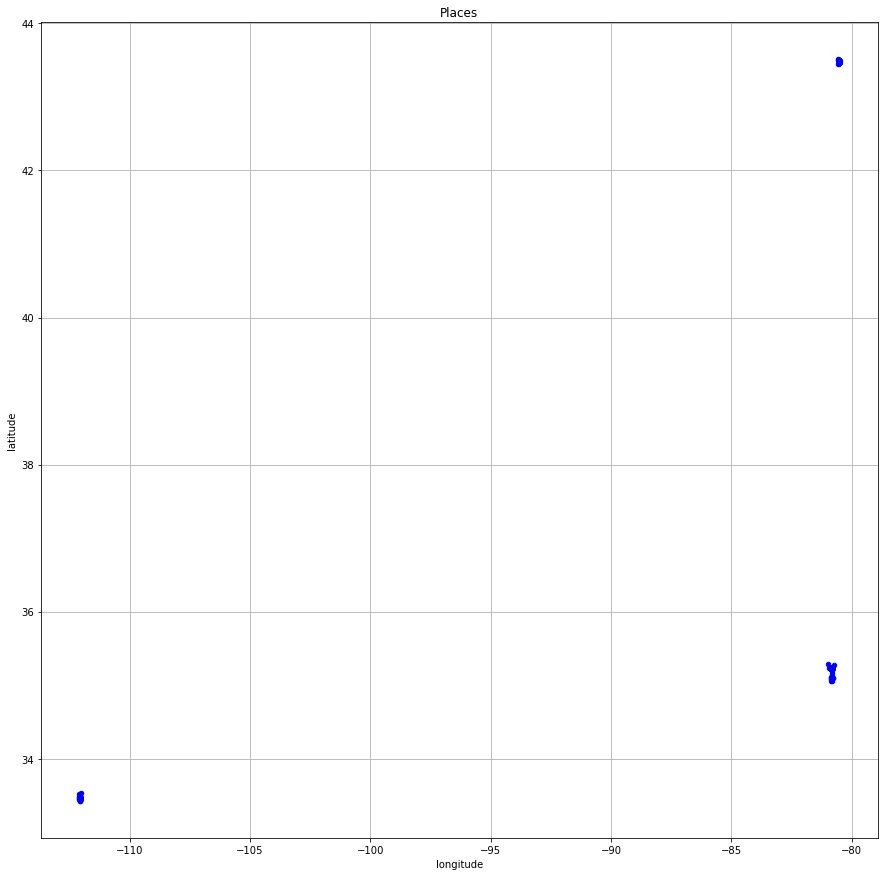

In [4]:
msplot = new_df.plot.scatter(x='longitude',y='latitude',c='Blue',title="Places",figsize=(15,15))
msplot.set_xlabel("longitude")
msplot.set_ylabel("latitude")
plt.grid()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [6]:
preprocessor = preprocessing.StandardScaler().fit(new_df)
new_df_transforemd = preprocessor.transform(new_df)

In [7]:
Std_df = pd.DataFrame(new_df_transforemd,  columns = new_df.columns)


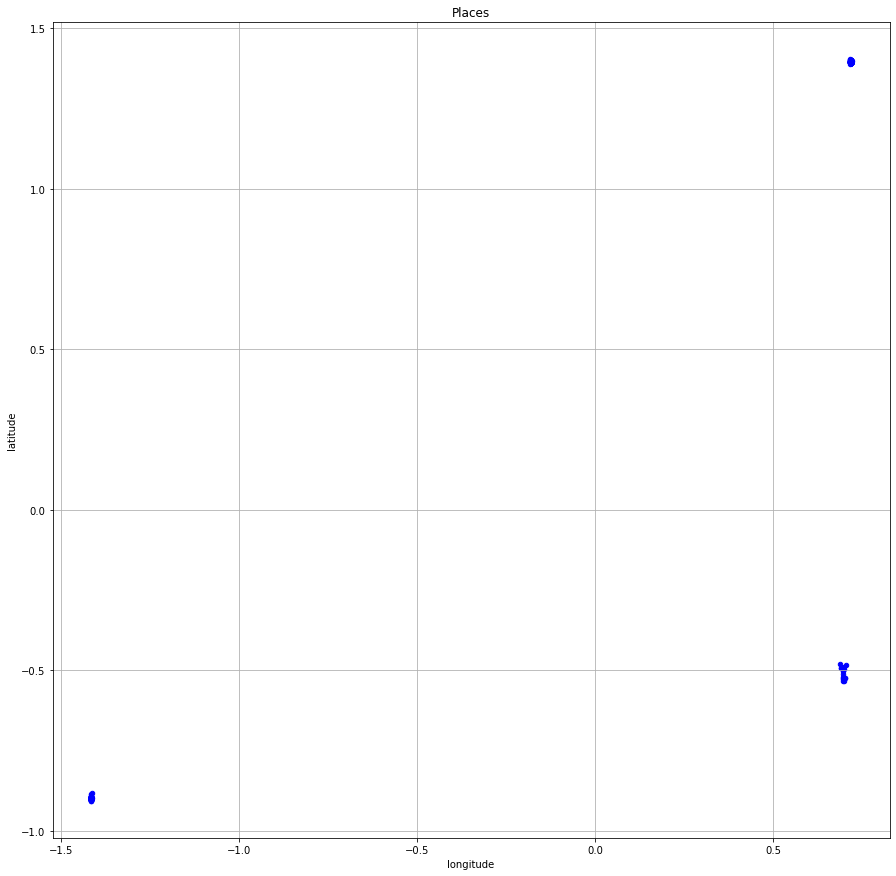

In [8]:
msplot = Std_df.plot.scatter(x='longitude',y='latitude',c='Blue',title="Places",figsize=(15,15))
msplot.set_xlabel("longitude")
msplot.set_ylabel("latitude")
plt.grid()
plt.show()

C:\Users\vinz\anaconda3\py\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


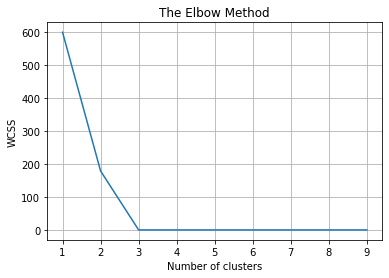

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,10): 
    kmeans=KMeans (n_clusters=i, init='random',random_state=42)
    kmeans.fit(Std_df)
    wcss.append(kmeans.inertia_)
plt.plot(range (1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Std_df)
print(y_kmeans)

[0 0 0 0 2 2 1 0 0 1 0 1 2 0 1 1 1 0 1 2 2 2 2 1 0 2 0 2 0 0 2 1 0 0 0 1 2
 0 2 1 1 1 1 1 1 2 0 1 0 0 2 1 0 1 2 1 0 1 2 1 0 2 1 0 2 1 1 0 2 1 2 0 1 2
 0 0 0 1 2 0 0 1 0 2 0 0 2 0 2 0 2 2 0 2 2 2 1 1 0 0 0 2 0 0 1 1 0 2 0 0 2
 1 0 2 0 0 2 0 2 2 1 1 0 2 1 2 1 2 1 2 1 2 1 0 0 2 2 0 0 2 1 1 0 2 1 1 1 0
 1 1 2 1 1 2 2 2 2 2 1 1 2 0 2 0 1 2 2 2 2 2 2 0 0 1 1 0 2 1 1 2 0 2 1 1 2
 1 1 2 0 2 1 1 0 0 0 1 0 0 1 0 2 0 1 0 2 1 0 2 1 1 2 1 1 0 2 2 0 2 0 2 0 2
 2 2 1 1 1 0 1 0 0 1 1 2 2 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 2 2 2 2 1 0 1
 0 2 0 1 2 2 0 2 0 2 0 2 1 0 1 2 2 0 0 2 2 1 1 1 1 2 2 1 2 2 0 2 0 1 0 2 0
 0 0 2 0]


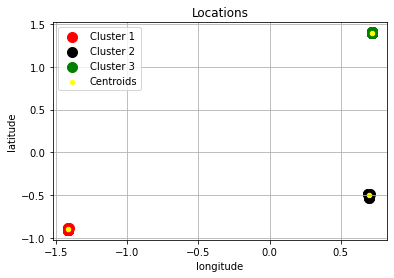

In [11]:
plt.scatter(Std_df[y_kmeans == 0]['longitude'], Std_df[y_kmeans == 0]['latitude'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Std_df[y_kmeans == 1]['longitude'], Std_df[y_kmeans == 1]['latitude'], s = 100, c = 'black', label = 'Cluster 2')
plt.scatter(Std_df[y_kmeans == 2]['longitude'], Std_df[y_kmeans == 2]['latitude'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Locations')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.grid()
plt.show()

In [12]:
#!pip install kneed

In [13]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1,10), wcss, curve="convex", direction="decreasing")
kl.elbow

3

In [14]:
df_kmeans = KMeans(n_clusters=kl.elbow, random_state=109, verbose=1).fit(Std_df)

Initialization complete
Iteration 0, inertia 0.011757776599383528
Converged at iteration 0: center shift 1.5833412661098566e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.011645633513474023
Converged at iteration 0: center shift 1.4711981802003799e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.011133663879348117
Converged at iteration 0: center shift 9.592285460743447e-06 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.011691793054676094
Converged at iteration 0: center shift 1.5173577214023798e-05 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.010966068292695141
Converged at iteration 0: center shift 7.91632959421489e-06 within tolerance 9.999999999999998e-05.
Initialization complete
Iteration 0, inertia 0.010738674938503659
Converged at iteration 0: center shift 5.642396052299422e-06 within tolerance 9.999999999999998e-

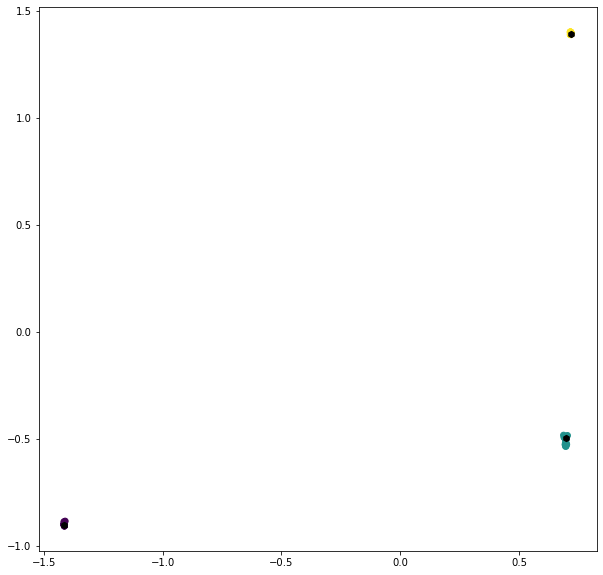

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(Std_df['longitude'],Std_df['latitude'], c=kmeans.labels_ ,label='centroids');
plt.scatter(df_kmeans.cluster_centers_[:,0],df_kmeans.cluster_centers_[:,1], c='Black', marker='h', s=40,);

In [16]:
df_kmeans.labels_

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1])

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(Std_df, df_kmeans.labels_)

0.9977041776728723

In [18]:
from sklearn.metrics import silhouette_score
inti_K = 1
End_K = 10
scores = [0]
for i in range(inti_K+1,End_K):
    fitx = KMeans(n_clusters=i, n_init=5, random_state=109).fit(Std_df)
    score = silhouette_score(Std_df, fitx.labels_)
    scores.append(score)

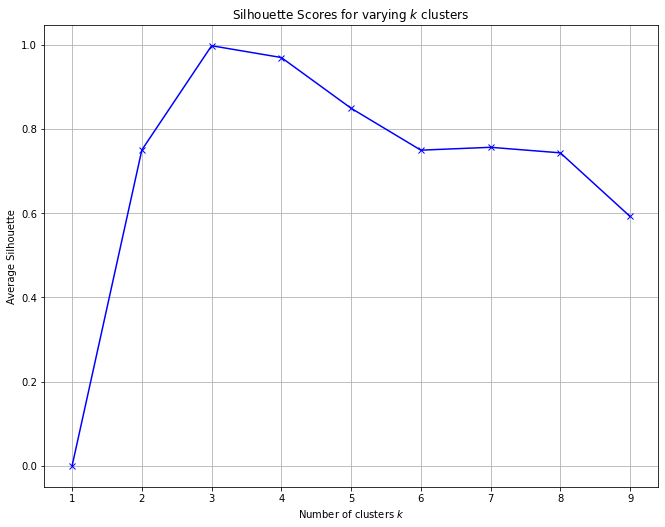

In [19]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for varying $k$ clusters')
plt.grid()
plt.show()

## Agglomerative cluster 

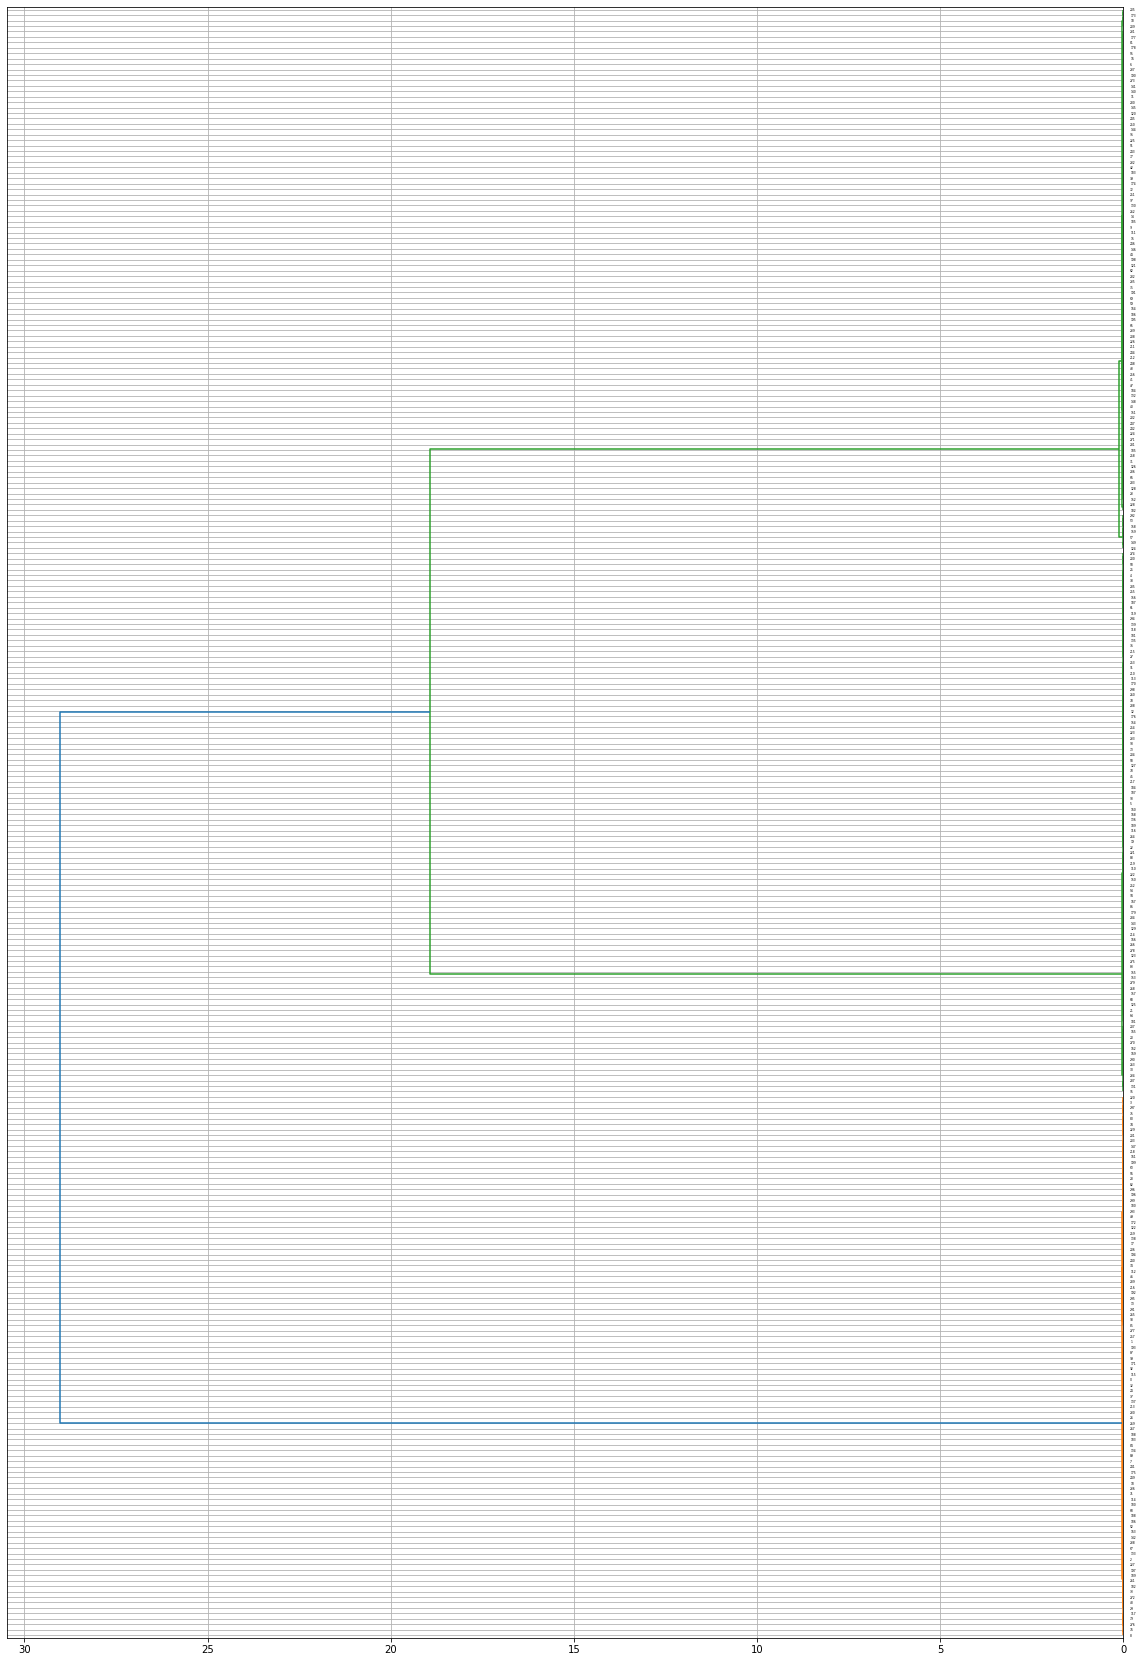

In [40]:
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
plt.figure(figsize=(20,30))
dist_mat = pdist(Std_df, metric="euclidean")
ward_data = hac.ward(dist_mat)
hac.dendrogram(ward_data, orientation='left', leaf_font_size=3);
plt.grid()

In [41]:
from sklearn.cluster import AgglomerativeClustering
Agglomerativecluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Agglomerativecluster.fit_predict(Std_df)

array([1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1], d

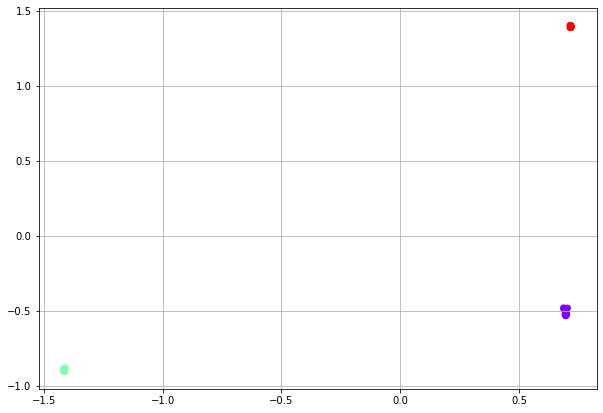

In [42]:
plt.figure(figsize=(10, 7))
plt.grid()
data = Std_df.values
plt.scatter(data[:,0], data[:,1], c=Agglomerativecluster.labels_, cmap='rainbow')

In [43]:
silhouette_score(Std_df, Agglomerativecluster.labels_)

0.9977041776728723

## DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.1).fit(Std_df)

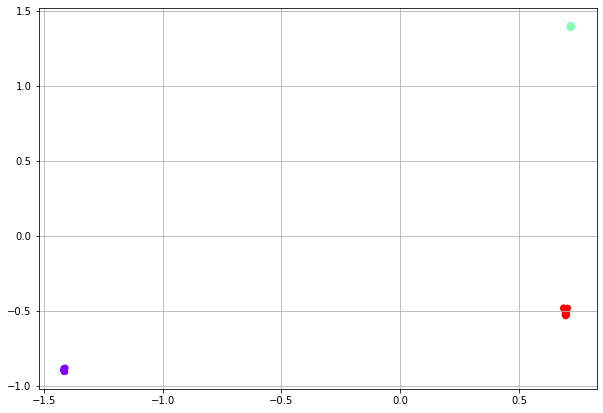

In [45]:
plt.figure(figsize=(10, 7))
data = Std_df.values
plt.scatter(data[:,0], data[:,1], c=dbscan.labels_, cmap='rainbow')
plt.grid()

In [46]:
silhouette_score(Std_df,dbscan.labels_)

0.9977041776728723

In [47]:
dbscan.labels_

array([0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0], d

In [48]:
ms_df = new_df.copy()

In [49]:
ms_df['cluster_label'] = dbscan.labels_

#  Gaussian Mixture

In [50]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(Std_df)
labels = gmm.predict(Std_df)
print(silhouette_score(Std_df,labels))

0.9977041776728723


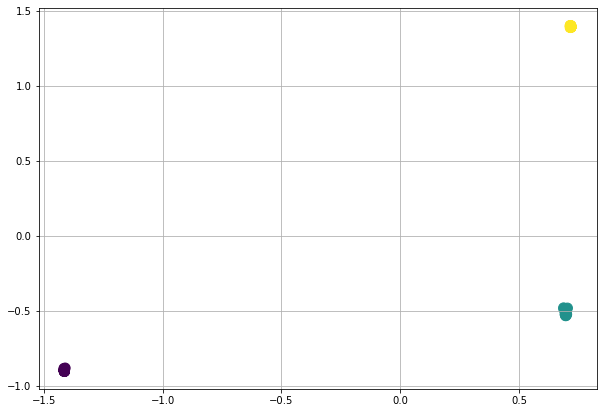

In [51]:
plt.figure(figsize=(10, 7))
labels = gmm.predict(Std_df)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=100, cmap='viridis');
plt.grid()

# Genetic algorithm / Simulated Annealing

In [52]:
ms_df.head()

,longitude,latitude,cluster_label
0,-112.070792,33.451625,0
1,-112.065542,33.449298,0
2,-112.073931,33.456491,0
3,-112.074866,33.470115,0
4,-80.525690,43.477099,1


In [53]:
number_of_clusters = ms_df['cluster_label'].unique()
number_of_clusters

array([0, 1, 2], dtype=int64)

In [54]:
number_of_clusters[1]

1

In [55]:
cluster = number_of_clusters[1]
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
num_points

100

In [56]:
points_coordinate = ms_df[ms_df['cluster_label'] == cluster][['longitude','latitude']]

In [57]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import math

distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [58]:
from sko.GA import GA_TSP
from sko.SA import SA_TSP
cluster = number_of_clusters[0]
print('for cluster number ', cluster)
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
print('num_points = ',num_points)
# Genetic Algorithm
print('\n====> Genetic Algorithm')
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)
# Simulated Annealing
print('\n====> Simulated Annealing')
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)
best_points, best_distance = sa_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)

for cluster number  0
num_points =  100

====> Genetic Algorithm
best_points =  [31 12 19 76 20 60 21  0 34 27 48 77 26 67 15 39  2 83 96 63  3 85 65  1
 43 57 44 35 90 18 92 51 28 14  5 47 87 32 56 40 75 74 73 46 61 45 70 93
 86 91 37 98 30  8 10 42 82 94 16 66 50 89  7  6 58  4 88 68 53 29 41 95
 97 54 78 84  9 52 17 49 64 71 13 11 36 22 23 55 38 24 79 62 25 80 33 81
 72 59 69 99]
best_distance =  [0.50021003]

====> Simulated Annealing
best_points =  [11 33 80 81 24 17 49 60 77 57 75 46  4 76 39  5 32 83 67 20 97 27 66 12
 54 51 45 70 40 63 99 38 78 53  3 41 30 29 16 85 73 23 44 71 22 88 52 94
 92 64 59 89 98  1 19 31 72 37 47 56 18 14 48 96  8  0 21 61  2 65 82 28
 74 43 25 62 86 93 87  6 26 10 42 55 84  7 50 34 13 91 35 90 36 95  9 58
 68 15 79 69]
best_distance =  1.4872511493733447


In [59]:
from sko.GA import GA_TSP
from sko.SA import SA_TSP
cluster = number_of_clusters[1]
print('for cluster number ', cluster)
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
print('num_points = ',num_points)
# Genetic Algorithm
print('\n====> Genetic Algorithm')
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)
# Simulated Annealing
print('\n====> Simulated Annealing')
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)
best_points, best_distance = sa_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)

for cluster number  1
num_points =  100

====> Genetic Algorithm
best_points =  [38 92 18 17 22 86 51 55 24 75 46 93 73 61 45 56 70 49 87 79 40 28 32 74
 23 14 47  5 16  0 11 89 10  8 71 42 35 64 50 36 66  7 13 94 82 43 65  1
  6 91 37 30 44 98 34 84 52 27 58  4 54 68 88 29  9 78 53 97 95 41 85  3
 96 33 39 80 77 26 59 15 12 25  2 83 99 21 60 69 62 63 72 19 67 31 81 48
 76 20 57 90]
best_distance =  [0.47084399]

====> Simulated Annealing
best_points =  [30 14 98 68 54  4 91 57 13 37 62 11  3 53 95 41 27  6 84  2 20 56 64 93
  1 43 60 28 42  9 26  7 81 76  0 80 73 32 55 83 70 15 40 10 78 85 86 50
 69 99 97 66 77 29 39 72 21 88 58 46 17 51 33 34 47 74 49 96 48 52 12 59
 24 75 92 71 45 94 65 61 23 36 89 16 44  5 35  8 18 38 87 90 22 31 67 25
 19 79 82 63]
best_distance =  1.42385733909063


In [60]:
from sko.GA import GA_TSP
from sko.SA import SA_TSP
cluster = number_of_clusters[2]
print('for cluster number ', cluster)
num_points = len(ms_df[ms_df['cluster_label'] == cluster])
print('num_points = ',num_points)
# Genetic Algorithm
print('\n====> Genetic Algorithm')
ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)
# Simulated Annealing
print('\n====> Simulated Annealing')
sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=500, T_min=0.1)
best_points, best_distance = sa_tsp.run()
print('best_points = ', best_points)
print('best_distance = ',best_distance)

for cluster number  2
num_points =  100

====> Genetic Algorithm
best_points =  [65 27 52 84  9 78 68 54 58  4 95 41 29 97 53 88  1 34 42 43 36 19 80 39
 69 72 63 20 62 31 60 76 67 15 85  3 83 99  2 59 33 81 48 77 96 21 25 12
 26 73 74 75 46 45 56 61 40 14 24 55 28 79 23 32 38  5 18 49 93 51 87 47
 17 90 22 70 92 86 91 37  6 30 35 98 44  8 64 13 10 71 94 82 16  7 66 89
 11  0 50 57]
best_distance =  [0.4439953]

====> Simulated Annealing
best_points =  [26 56 49 57 28 16  9 11 67 91 73 63 31 54 69 25 34 94 96 33 82 24 44 81
 47 93 40  8 35 37 55 13 45 58 92 59 75 60 19  3 22 18 46 36 70 14  2 89
 32 98 62 85 48 77 20  0 66 10  7 41 53  4  1 52 78 39 80 83 42 87 99 15
 61 64 50 72 86 38 27 76 90 30 65 43 71 95 84 68  6 51 29 88 97 23 17  5
 79 74 12 21]
best_distance =  1.4401095400635953


In [61]:
''' The best silhouette_score was for DB_SCAN and hence we chose the model for finding the best shortest 
    distence amount the cluster for the given dataset and on finding the best distance for the cluster, cluster 
    2 gives the best shortest distance amoung the three clusters'''

' The best silhouette_score was for DB_SCAN and hence we chose the model for finding the best shortest \n    distence amount the cluster for the given dataset and on finding the best distance for the cluster, cluster \n    0 gives the best shortest distance amoung the three clusters'